In [1]:
#텍스트 마이닝: 텍스트 속에서 뭔가 의미있는 정보를 뽑아낸다.
#웹크롤링을 통한 리뷰분석
#영화리뷰
#1. 리뷰 텍스트가 얼마나 긍/부정적인지 분석하기(감정분석)
#2. 주요키워드를 분석하고 워드클라우드 사용해서 시각화


https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3
0.1779
-0.6597
0.2846
0.4926
0.8625
0.2023
0.9358
0.9402
0.6776
0.0
0.7089
0.5781
0.9226
0.6743
-0.7951
-0.7579
0.0
0.7964
0.2247
0.4215
0.0
0.5859
0.4404
0.2263
0.6705
0.4215
0.6249
0.4588
0.0
-0.5994
-0.636
0.5413
0.6948
-0.4767
0.2023
0.4019
0.3612
0.8979
0.0
0.6344
0.0
0.4588
0.7972
-0.4875
0.2732
0.8664
0.4404
0.0
0.3089
-0.1548
0.6369
-0.296
-0.5719
0.0
0.0
-0.3535
-0.4404
0.0
0.3818
0.0
0.0
0.5106
0.8834
0.5994
0.0
0.0772
0.5994
0.0
-0.7003
-0.3612
0.0
0.7818
0.6705
-0.3612
0.0516
-0.5486
0.8402
0.3716
-0.0516
-0.2023
-0.7269
-0.3818
-0.079
0.8399
0.765
0.0
0.7269
0.0724
0.8402
0.9042
-0.7741
0.8225
-0.0258
-0.7717
-0.4019
-0.4404
-0.4588
0.3687
0.0516
0.6872
0.891
0.5563
0.0
-0.34
-0.2263
-0.1832
0.3182
-0.8268
-0.5759
0.7096
0.4404
-0.3832
0.8718
0.4215
-0.5468
-0.2732
0.0
0.4404
-0.0258
0.0
-0.5267
-0.8122
-0.5809
-0.8658
0.7579
-0.34
-0.6597
0.6924
-0.296
0.6124
-0.6249
0.6808
-0.2023
-0.3612
0.765
0.0
-0.2263
0.4902


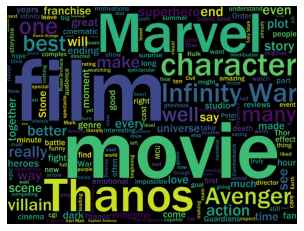

In [7]:
from urllib.request import urlopen  # 파이썬 3의 경우 from urllib.request import urlopen
from bs4 import BeautifulSoup
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#openyxl을 이용해 엑셀파일로 저장하기 위한 준비 과정
excell=Workbook(write_only=True)
ws=excell.create_sheet()
ws.append(['score','title','writer','date','review','senti_score'])
#웹 페이지 불러오기
url= 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'
print(url)
webpage=urlopen(url)
source=BeautifulSoup(webpage,'html.parser',from_encoding='utf-8')
review_list=source.findAll('div',{'class':'imdb-user-review'})
sid=SentimentIntensityAnalyzer()#VADER감정분석기 미리준비
sum_review=""

#각 리뷰마다
for review in review_list:
    #리뷰내에서 태그, 클래스 이용해서 정보 뽑아내는 부분
    list1=[]
    score=review.find('span').get_text()
    title=review.find('a').get_text().replace('\n','')
    writer=review.find('span',{'class':'display-name-link'}).get_text()
    date=review.find('span',{'class':'review-date'}).get_text()
    content=review.find('div',{'class':'text show-more__control'}).get_text()
    #엑셀 파일에 저장하기 위해 list에 각 정보를 추가
    list1.append(score)
    list1.append(title)
    list1.append(writer)
    list1.append(date)
    list1.append(content)
    sum_review = sum_review + content
    lines_list=tokenize.sent_tokenize(content)#리뷰 텍스트를 문장별로 쪼개는 전처리 함수
    
    sum=0
    for sent in lines_list:
        ss=sid.polarity_scores(sent)
        print(ss['compound'])
        sum=sum+ss['compound']
    sum1=str(sum/len(lines_list))#문장들의 평균점수가 그 리뷰의 감정 점수
    list1.append(sum1)
    ws.append(list1)
excell.save('imdb_.xlsx')

def generate_wordcloud(text):
    wordcloud=WordCloud(font_path='framd.ttf',width=2400,height=1800,ranks_only=None,relative_scaling=0.8,stopwords=set(STOPWORDS)).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
generate_wordcloud(sum_review)